In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
data = pd.read_csv('GOOG.csv', date_parser=True)

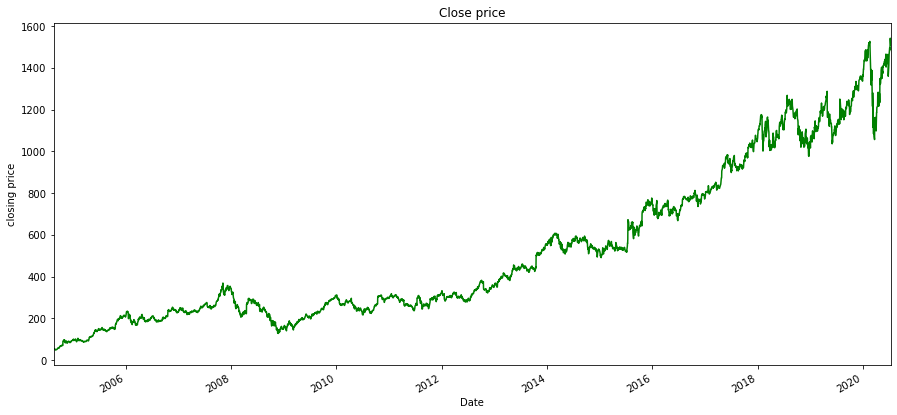

In [4]:
data1 =  pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col=['Date'])
data1.head()
plt.figure(figsize=(15,7))
plt.title('Close price')
plt.grid(True)
plt.xlabel('date')
plt.ylabel('closing price')
data1['Close'].plot(color = 'green')

In [5]:
data_training = data[data.Date<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [6]:
data_test = data[data.Date>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3997,2020-07-07,1490.000000,1516.800049,1483.550049,1485.180054,1485.180054,1458200
3998,2020-07-08,1494.319946,1505.880005,1485.630005,1496.000000,1496.000000,1249700
3999,2020-07-09,1506.449951,1522.719971,1488.084961,1510.989990,1510.989990,1423300
4000,2020-07-10,1506.150024,1543.829956,1496.540039,1541.739990,1541.739990,1856300


In [7]:
train = data_training.drop(['Date','Adj Close'], axis=1)
train.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [8]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
train

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [9]:
x_train = []
y_train = []

In [10]:
for i in range(60,train.shape[0]):
    x_train.append(train[i-60:i,:])
    y_train.append(train[i,0])

In [11]:

    #if i<=61:
     #       print(X_train)
      #      print(Y_train)
       #     print()

In [12]:
X_train, Y_train = np.array(x_train), np.array(y_train)

# Lstm model


In [13]:
model  = keras.models.Sequential()

In [14]:
model.add(keras.layers.LSTM(units=80, return_sequences= True, input_shape = (X_train.shape[1], 5)  ))
model.add(keras.layers.LSTM(units=50, return_sequences= False, activation = 'relu'))
model.add(keras.layers.Dense(30))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Dense(1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 80)            27520     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dense (Dense)                (None, 30)                1530      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 55,571
Trainable params: 55,571
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'adam', loss = 'mae')

In [17]:
model_hist  = model.fit(X_train,Y_train, epochs = 5, batch_size = 32, validation_split = 0.2)

Train on 2845 samples, validate on 712 samples
Epoch 1/5
2845/2845 [==============================] - 70s 25ms/sample - loss: 0.0240 - val_loss: 0.0177
Epoch 2/5
2845/2845 [==============================] - 57s 20ms/sample - loss: 0.0086 - val_loss: 0.0178
Epoch 3/5
2845/2845 [==============================] - 67s 24ms/sample - loss: 0.0078 - val_loss: 0.0138
Epoch 4/5
2845/2845 [==============================] - 67s 23ms/sample - loss: 0.0071 - val_loss: 0.0158
Epoch 5/5
2845/2845 [==============================] - 58s 21ms/sample - loss: 0.0071 - val_loss: 0.0136


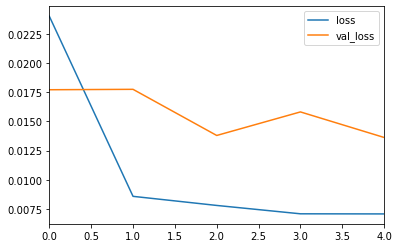

In [18]:
pd.DataFrame(model_hist.history).plot()

# testing and evaluation

In [19]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [20]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [21]:
past_60_days = data_training.tail(60)

In [22]:
df = past_60_days.append(data_test, ignore_index=True)
df.shape

(445, 7)

In [23]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [24]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [1.19274054, 1.20342375, 1.19901858, 1.19914461, 0.01714938],
       [1.19249502, 1.22068161, 1.20605733, 1.22438031, 0.02239573],
       [1.22839083, 1.2479064 , 1.21330217, 1.19943183, 0.02227607]])

In [25]:
X_test = []
y_test = []

In [26]:
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i,])
    y_test.append(inputs[i,0])

In [27]:
X_test,y_test = np.array(X_test), np.array(y_test)

In [28]:
X_test.shape, y_test.shape

((385, 60, 5), (385,))

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([[0.7880638 ],
       [0.7903394 ],
       [0.79225904],
       [0.79558235],
       [0.8006188 ],
       [0.8065348 ],
       [0.81247115],
       [0.81689626],
       [0.81944984],
       [0.81983155],
       [0.820808  ],
       [0.8235869 ],
       [0.8267085 ],
       [0.83114743],
       [0.8336156 ],
       [0.8348003 ],
       [0.8349985 ],
       [0.8362313 ],
       [0.83622694],
       [0.835044  ],
       [0.8347027 ],
       [0.8373239 ],
       [0.84133863],
       [0.84633   ],
       [0.85235894],
       [0.8577999 ],
       [0.8594823 ],
       [0.8591295 ],
       [0.8582541 ],
       [0.8586373 ],
       [0.8603477 ],
       [0.8618863 ],
       [0.8633712 ],
       [0.8642015 ],
       [0.86463946],
       [0.8635821 ],
       [0.86227363],
       [0.861639  ],
       [0.8610427 ],
       [0.8606522 ],
       [0.86102945],
       [0.86319554],
       [0.866936  ],
       [0.872076  ],
       [0.87766176],
       [0.8815339 ],
       [0.88325423],
       [0.886

In [31]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [32]:
scale = 1/8.86587579e-04
scale

1127.920155533783

In [33]:
y_pred = y_pred*scale
y_test = y_test*scale

In [34]:
y_pred.shape


(385, 1)

In [35]:
y_pred 

array([[ 888.8731 ],
       [ 891.43976],
       [ 893.6049 ],
       [ 897.3534 ],
       [ 903.0341 ],
       [ 909.7069 ],
       [ 916.4026 ],
       [ 921.39374],
       [ 924.274  ],
       [ 924.7045 ],
       [ 925.8059 ],
       [ 928.94025],
       [ 932.4612 ],
       [ 937.46796],
       [ 940.25183],
       [ 941.5881 ],
       [ 941.81165],
       [ 943.20215],
       [ 943.1972 ],
       [ 941.863  ],
       [ 941.47797],
       [ 944.4345 ],
       [ 948.9628 ],
       [ 954.59265],
       [ 961.3928 ],
       [ 967.5298 ],
       [ 969.4274 ],
       [ 969.0295 ],
       [ 968.04205],
       [ 968.4743 ],
       [ 970.4035 ],
       [ 972.139  ],
       [ 973.8138 ],
       [ 974.7503 ],
       [ 975.24426],
       [ 974.05164],
       [ 972.5758 ],
       [ 971.86005],
       [ 971.1874 ],
       [ 970.747  ],
       [ 971.1725 ],
       [ 973.61566],
       [ 977.83466],
       [ 983.6321 ],
       [ 989.9324 ],
       [ 994.29987],
       [ 996.24023],
       [ 999.

 # Vizualize

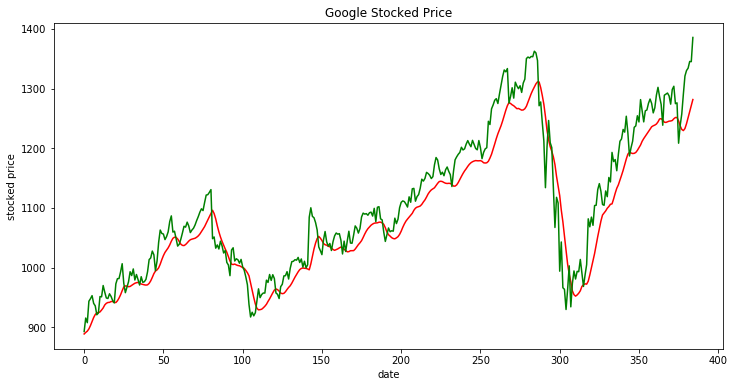

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_pred, color = 'red', label = 'Google predicted stocked Price')
plt.plot(y_test, color = 'green', label = 'Google real stock price')
plt.xlabel('date')
plt.ylabel('stocked price')
plt.title('Google Stocked Price')
plt.show()

In [37]:
y_test.shape, y_pred.shape

((385,), (385, 1))